# The Fundamental Plane of Elliptical Galaxies 

## Authors
B.W. Holwerda

## Learning Goals
* Fundamental Plane of Elliptical Galaxies
* Kinematic Mass estimates
* Stellar Mass-to-light ratio
* dark matter
* Lensing mass estimates

## Keywords
Elliptical galaxies, fundamental plane, gravitational lensing

## Companion Content
Ryden & Peterson's "Foundations in Astrophysics" 

## Summary

Plot the absolute values of the Fundamental plane, note that it is 3D, and map out the expected Einstein radii.
Discuss how many mass estimates a lensing galaxy in this survey now has. 
<hr>


## Student Name and ID:



## Date:

<hr>

## Exercise 1 -- 

In [2]:
# read in necessary libraries
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt


First we read in the catalog of the SLACS (SLOAN Lensing ACS Survey) from Bolton+ (2008). Many more results are based on this sample.


In [3]:

slacs = ascii.read("./slacs.csv",format='csv')
print(slacs.columns)
print(slacs['name'])

<TableColumns names=('name','Plate-MJD-FiberID','zpg','zbg','I814','ext','LV','re','LeLdev','BA','PA','sigma','sigmaerr','class','bSIE','qSIE','paSIE','LSIEdev','bLTM','gamma','PAgamma','LLTMdev','Nstruc','Ring','Goodsigma')>
       name       
------------------
000802.96-000408.2
002907.77-005550.5
003753.21-094220.1
004402.90+011312.6
010933.73+150032.5
015758.94-005626.1
021652.54-081345.3
025245.21+003958.4
033012.14-002051.9
040535.41-045552.4
               ...
153150.07-010545.7
153812.92+581709.8
162132.99+393144.6
162746.45-005357.6
163028.16+452036.3
163602.62+470729.6
223840.20-075456.0
230053.15+002238.0
230321.72+142217.9
232120.93-093910.3
234111.57+000018.7
Length = 63 rows


## Exercise 1 -- Plot the three relations that make the observed Fundamental Plane of Elliptical Galaxies

* apparent magnitude - effective radius
* apparent magnitude - velocity dispersion
* velocity dispersion - effective radius

## Exercise 1.1 m - re

In [1]:
# Plot I - Re Re-sigma I-sigma
import matplotlib.pyplot as plt

# student work here

## Exercise 1.2 re - sigma

In [2]:
# student work here

## Exercise 1.3 m - sigma

In [3]:
# student work here

But wait! These are not *distance independent* values. Convert the apparent magnitude to an absolute magnitude and the effective radius to kpc.

In [4]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=73.02, Om0=0.262)

M814 = slacs['I814'] - np.asarray(cosmo.distmod(slacs['zpg']) ) 
Re = slacs['re']*cosmo.kpc_proper_per_arcmin(slacs['zpg'])/60. 
# neat little trick, a function that automatically converts an angular scale in arcmin to kpc at redshift z

G = 6.67408*10**(-11) # the gravitational constant
Msun = 1.989*10**(30) # Sun's mass in kg

Msolar = 4.51 # Absolute magnitude of the Sun in F814W from http://mips.as.arizona.edu/~cnaw/sun.html
Upsilon = 0.8 #10**.1 # not completely correct but ballpark




NameError: name 'slacs' is not defined

## Exercise 2.1 -- convert magnitude into stellar mass and $\sigma$ into total (kinematic) mass. 

Spheroidal (elliptical) galaxies do not rotate and so we need to use the stellar *dispersion* ($\sigma$), it's half-light radius ($r_h$) to measure it's mass:

$$M = 7.5 {\sigma^2 r_h \over G}$$

And to convert the Absolute magnitude to a stellar mass, we need the solar absolute magnitude in the filter in question (F814W on Hubble or Johnson I-band, 800nm) and the *stellar mass-to-light ratio* $\Upsilon$

$$M^* = \Upsilon*10^{ (M_\odot-M_{814})/2.5}$$

Let us assume $\Upsilon \sim 0.8$ for now.

Plot the kinematic and stellar mass against each other. Is there a 1:1 correlation?



In [ ]:

# student work here


## Exercise 2.2 -- What is the Mass-to-light ratio ($\Upsilon$) needed to match kinematic and stellar masses?

In [4]:
# student work here 



## Exercise 2.3 -- Is the above mass-to-light ratio reasonable? Motivate your answer.

*your answer here*

## Exercise 3 -- Gravitational Lensing

The equation to calculate the Einstein radius of a Gravitational Lens is expressed by:

$$\theta_E = \left( {M \over 10^{11.09} M_\odot} \right)^{1/2} \left( {D_L D_S/D_{LS} \over Gpc} \right)^{-1/2} $$

Using the kinematic mass as your total mass estimate and distances from the foreground and background redshift solution (slacs['zpg'],slacs['zbg']) calculates the size of the Einstein ring for these galaxies. 

Plot these against the effective radius in arcseconds (slacs['re']). 

Use cosmo.luminosity_distances(z) to obtain distances in Mpc (note they need to be in Gpc for the above expression).

## Exercise 3.1 Plot the Einstein radius against the effective radius

In [5]:

# student work here
                    
                                            

## Exercise 3.2 Can Einstein Rings be observed?

Are the Einstein Rings well outside or inside the lensing galaxy? Motivate your answer.

*your answer here*

## Exercise 3.3 Mass Estimates

If we measure the Einstein radius, and all of the above values (absolute magnitude, effective radius and velocity dispersion), how many mass estimates for this galaxy do we now have?
Which do you expect to be the *lowest* mass estimate and which one the *highest*? motivate the answer. 

*your answer here*

## References

Bolton+ (2008) -- http://adsabs.harvard.edu/abs/2008ApJ...682..964B




## BONUS -- Examine the 3D plot of the Fundamental Plane

*run these cells after you're done with your work above, it uses a slightly different rendering*

<IPython.core.display.Javascript object>


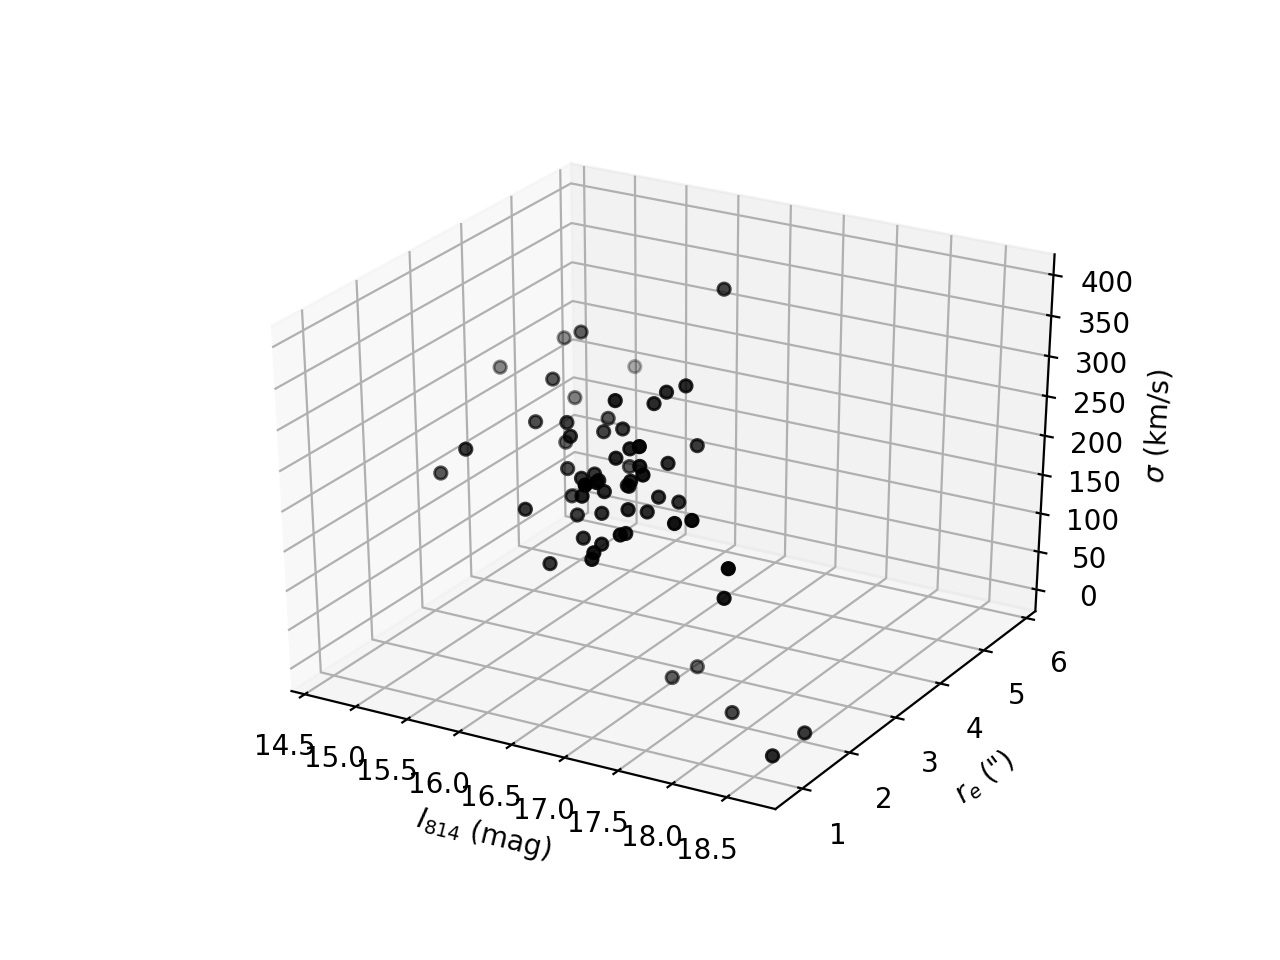

Text(0.5,0,'$\\sigma$ (km/s)')

In [17]:
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook

# the observed Fundamental Plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(slacs['I814'], slacs['re'], slacs['sigma'], c='k', marker='o')

ax.set_xlabel(r'$I_{814}$ (mag)')
ax.set_ylabel(r'$r_e$ (")')
ax.set_zlabel(r'$\sigma$ (km/s)')

     I814     
--------------
-23.2139495217
 -23.097075446
-23.5614418792
 -22.917685783
 -23.080181509
-23.6272794969
-24.2064004537
-22.6711419724
-23.1184542975
-21.1255180716
           ...
-23.2517540002
-22.4064303389
-23.5645860409
-23.0578855206
  -23.61477777
-23.1700622862
-22.7697794317
-23.1332992173
-23.1664057189
-23.1082780602
 -23.340499827
Length = 63 rows


<IPython.core.display.Javascript object>


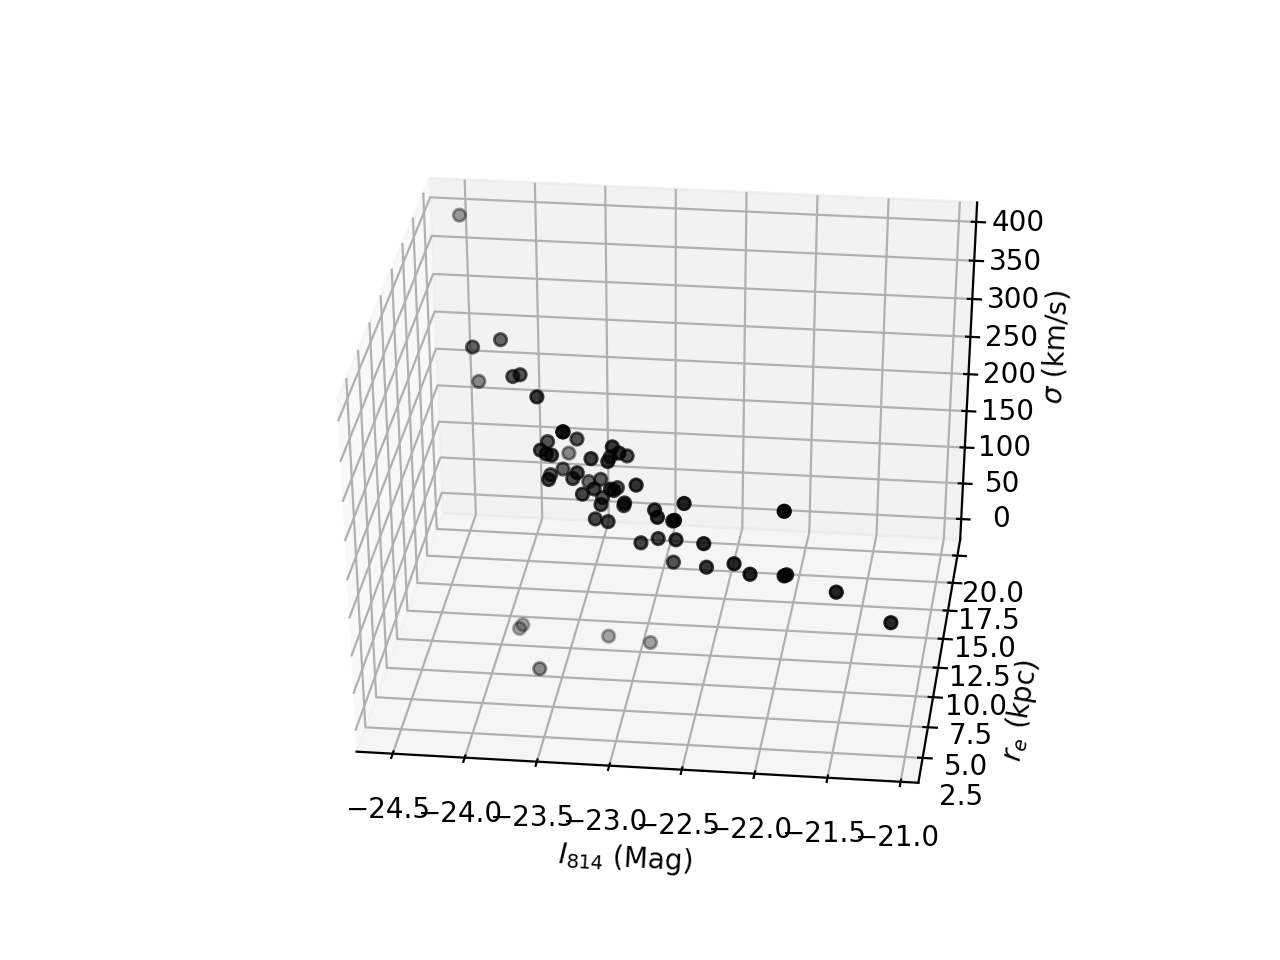

Text(0.5,0,'$\\sigma$ (km/s)')

In [18]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=73.02, Om0=0.262)

M814 = slacs['I814'] - np.asarray(cosmo.distmod(slacs['zpg']) ) 
Re = slacs['re']*cosmo.kpc_proper_per_arcmin(slacs['zpg'])/60. 

# the Fundamental plane corrected for distances

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M814, Re, slacs['sigma'], c='k', marker='o')

ax.set_xlabel(r'$I_{814}$ (Mag)')
ax.set_ylabel(r'$r_e$ (kpc)')
ax.set_zlabel(r'$\sigma$ (km/s)')